In [ ]:
import numpy as np
import pandas as pd
r_low=320
r_high=420
theta_low=10 / 180.0 * np.pi
theta_high=30 / 180.0 * np.pi

# r_low=300
# r_high=500
# theta_low=0
# theta_high=50 / 180.0 * np.pi

Rmean_low=25
Rmean_high=45.0
Eage_low=0.8
Eage_high=1.2
R_ue_high=-5.0
log10TeV_low=1.79
log10TeV_high=2.1131057739257812


def filter_dataset_optimized(npz_file, output_file, mc=True):
    # param_names=["label","weight",
    #                 "R_ue", "R_mean", "Eage",
    #                 "recE", "rec_x", "rec_y", "rec_theta", "rec_phi", 
    #                 "trueE", "NuW2", "NpE3", "NuM1", "core_x","core_y","theta"]
    data = np.load(npz_file, allow_pickle=True)
    params = data["params"]
    params_df = pd.DataFrame(params, columns=data["param_names"])
    
    initial_count = len(params)
    current_mask = np.ones(initial_count, dtype=bool)
    
   
    recE= params_df["recE"].values
    R_ue =  params_df["R_ue"].values
    R_mean = params_df["R_mean"].values
    Eage = params_df["Eage"].values
    rec_x = params_df["rec_x"].values
    rec_y = params_df["rec_y"].values
    
    # 向量化计算 r
    r = np.sqrt(rec_x**2 + rec_y**2)

    # --------------------------------------------------
    # 顺序筛选与打印比例
    # --------------------------------------------------
    print(f"--- 原始数据量: {initial_count} ---")
    
    # 1. 筛选 r (r_low < r < r_high)
    r_mask = (r > r_low) & (r < r_high)
    n_last = current_mask.sum()
    current_mask = current_mask & r_mask
    n_after = current_mask.sum()
    print(f"1. Cut r: {n_after} / {n_last} (Left Ratio: {n_after/n_last:.2%})")

    # 2. 筛选 theta (theta_low < theta < theta_high)
    theta_mask = (params[:, 8] > theta_low) & (params[:, 8] < theta_high)
    n_last = current_mask.sum()
    current_mask = current_mask & theta_mask
    n_after = current_mask.sum()
    print(f"2. Cut theta: {n_after} / {n_last} (Left Ratio: {n_after/n_last:.2%})")

    # 0. 筛选 log10TeV (log10TeV_low < recE < log10TeV_high)
    log10TeV_mask = (recE > log10TeV_low) & (recE < log10TeV_high)
    n_last = current_mask.sum()
    current_mask = current_mask & log10TeV_mask
    n_after = current_mask.sum()
    print(f"0. Cut log10TeV: {n_after} / {n_last} (Left Ratio: {n_after/n_last:.2%})")
    # 2. 筛选 Eage (Eage_low < Eage < Eage_high)
    Eage_mask = (Eage > Eage_low) & (Eage < Eage_high)
    n_last = current_mask.sum()
    current_mask = current_mask & Eage_mask
    n_after = current_mask.sum()
    print(f"3. Cut Eage: {n_after} / {n_last} (Left Ratio: {n_after/n_last:.2%})")

    # 3. 筛选 R_mean (Rmean_low < R_mean < Rmean_high)
    Rmean_mask = (R_mean > Rmean_low) & (R_mean < Rmean_high)
    n_last = current_mask.sum()
    current_mask = current_mask & Rmean_mask
    n_after = current_mask.sum()
    print(f"4. Cut R_mean: {n_after} / {n_last} (Left Ratio: {n_after/n_last:.2%})")

    # if not mc:
    #     # 4. 筛选 R_ue (R_ue < R_ue_high)
    #     R_ue_mask = (R_ue < R_ue_high)
    #     n_last = current_mask.sum()
    #     current_mask = current_mask & R_ue_mask
    #     n_after = current_mask.sum()
    #     print(f"5. Cut R_ue: {n_after} / {n_last} (Left Ratio: {n_after/n_last:.2%})")

    # --------------------------------------------------
    # 数据保存 (保持与原函数一致)
    # --------------------------------------------------
    
    # 打印最终统计信息
    final_count = current_mask.sum()
    print(f"\n--- 筛选结果 ---")
    print(f"原始数据量: {initial_count}")
    print(f"筛选后数据量: {final_count}")
    print(f"总通过比例: {final_count/initial_count:.2%}")

    filtered_data = {}
    keys = data.files
    
    for key in keys:
        if key == "param_names":
            filtered_data[key] = data[key]
        else:
            # 使用布尔掩码直接筛选数组，这是最快的方法
            filtered_data[key] = data[key][current_mask]

    np.savez(output_file, **filtered_data)
    print(f"筛选后的数据已保存到: {output_file}")
    print("--------------------------------------------------")
    # 关闭文件
    data.close()

def filter_dataset_optimized_old(npz_file, output_file, mc=True):
    # param_names=["label","weight",
    #             "R_ue", "R_mean", "Eage", "trueE", "recE", "rec_x", "rec_y", "rec_theta", "rec_phi"]
    data = np.load(npz_file, allow_pickle=True)
    params = data["params"]
    params_df = pd.DataFrame(params, columns=data["param_names"])
    
    initial_count = len(params)
    current_mask = np.ones(initial_count, dtype=bool)
    
   
    recE= params_df["recE"].values
    R_ue =  params_df["R_ue"].values
    R_mean = params_df["R_mean"].values
    Eage = params_df["Eage"].values
    rec_x = params_df["rec_x"].values
    rec_y = params_df["rec_y"].values
    
    # 向量化计算 r
    r = np.sqrt(rec_x**2 + rec_y**2)

    # --------------------------------------------------
    # 顺序筛选与打印比例
    # --------------------------------------------------
    print(f"--- 原始数据量: {initial_count} ---")
    
    # 1. 筛选 r (r_low < r < r_high)
    r_mask = (r > r_low) & (r < r_high)
    n_last = current_mask.sum()
    current_mask = current_mask & r_mask
    n_after = current_mask.sum()
    print(f"1. Cut r: {n_after} / {n_last} (Left Ratio: {n_after/n_last:.2%})")

    # 2. 筛选 theta (theta_low < theta < theta_high)
    theta_mask = (params[:, 9] > theta_low) & (params[:, 9] < theta_high)
    n_last = current_mask.sum()
    current_mask = current_mask & theta_mask
    n_after = current_mask.sum()
    print(f"2. Cut theta: {n_after} / {n_last} (Left Ratio: {n_after/n_last:.2%})")

    # 0. 筛选 log10TeV (log10TeV_low < recE < log10TeV_high)
    log10TeV_mask = (recE > log10TeV_low) & (recE < log10TeV_high)
    n_last = current_mask.sum()
    current_mask = current_mask & log10TeV_mask
    n_after = current_mask.sum()
    print(f"0. Cut log10TeV: {n_after} / {n_last} (Left Ratio: {n_after/n_last:.2%})")

    # 2. 筛选 Eage (Eage_low < Eage < Eage_high)
    Eage_mask = (Eage > Eage_low) & (Eage < Eage_high)
    n_last = current_mask.sum()
    current_mask = current_mask & Eage_mask
    n_after = current_mask.sum()
    print(f"3. Cut Eage: {n_after} / {n_last} (Left Ratio: {n_after/n_last:.2%})")

    # 3. 筛选 R_mean (Rmean_low < R_mean < Rmean_high)
    Rmean_mask = (R_mean > Rmean_low) & (R_mean < Rmean_high)
    n_last = current_mask.sum()
    current_mask = current_mask & Rmean_mask
    n_after = current_mask.sum()
    print(f"4. Cut R_mean: {n_after} / {n_last} (Left Ratio: {n_after/n_last:.2%})")

    # if not mc:
    #     # 4. 筛选 R_ue (R_ue < R_ue_high)
    #     R_ue_mask = (R_ue < R_ue_high)
    #     n_last = current_mask.sum()
    #     current_mask = current_mask & R_ue_mask
    #     n_after = current_mask.sum()
    #     print(f"5. Cut R_ue: {n_after} / {n_last} (Left Ratio: {n_after/n_last:.2%})")

    # --------------------------------------------------
    # 数据保存 (保持与原函数一致)
    # --------------------------------------------------
    
    # 打印最终统计信息
    final_count = current_mask.sum()
    print(f"\n--- 筛选结果 ---")
    print(f"原始数据量: {initial_count}")
    print(f"筛选后数据量: {final_count}")
    print(f"总通过比例: {final_count/initial_count:.2%}")

    filtered_data = {}
    keys = data.files
    
    for key in keys:
        if key == "param_names":
            filtered_data[key] = data[key]
        else:
            # 使用布尔掩码直接筛选数组，这是最快的方法
            filtered_data[key] = data[key][current_mask]

    np.savez(output_file, **filtered_data)
    print(f"筛选后的数据已保存到: {output_file}")
    
    # 关闭文件
    data.close()

npz_file = "/home/zhonghua/data/Dataset_Filted/Experiment/2022/all_combined_2022_dataset_1e10_for_diffmodels.npz"
output_file = "/home/zhonghua/data/Dataset_Filted/Experiment/2022/all_combined_2022_dataset_1e10_for_diffmodels_strict.npz"
# output_file = "/home/zhonghua/data/Dataset_Filted/Experiment/2022/all_combined_2022_dataset_1e10_for_diffmodels_strict_300_500.npz"
filter_dataset_optimized(npz_file, output_file, mc=False)

npz_file = "/home/zhonghua/data/Dataset_Filted/CosmicRay/Npz/0818_filted_EF_Proton_4e13_1e15_dataset.npz"
output_file = "/home/zhonghua/data/Dataset_Filted/CosmicRay/Npz/0818_filted_EF_Proton_4e13_1e15_dataset_strict.npz"
filter_dataset_optimized(npz_file, output_file)

npz_file = "/home/zhonghua/data/Dataset_Filted/CosmicRay/Npz/0818_filted_QF_Proton_4e13_1e15_dataset.npz"
output_file = "/home/zhonghua/data/Dataset_Filted/CosmicRay/Npz/0818_filted_QF_Proton_4e13_1e15_dataset_strict.npz"
filter_dataset_optimized(npz_file, output_file)

npz_file  = "/home/zhonghua/data/Dataset_Filted/1e10_V03/Proton_all_combined_filted_1e10_V03_12_16_dataset.npz"
output_file = "/home/zhonghua/data/Dataset_Filted/1e10_V03/Proton_all_combined_filted_1e10_V03_12_16_dataset_strict.npz"
filter_dataset_optimized_old(npz_file, output_file)

npz_file = "/home/zhonghua/data/Dataset_Filted/CosmicRay/Npz/Proton_1000_70_1e10_V03_dataset.npz"
output_file = "/home/zhonghua/data/Dataset_Filted/CosmicRay/Npz/Proton_1000_70_1e10_V03_dataset_strict.npz"
# output_file = "/home/zhonghua/data/Dataset_Filted/CosmicRay/Npz/Proton_1000_70_1e10_V03_dataset_strict_300_500.npz"
filter_dataset_optimized(npz_file, output_file)

npz_file  = "/home/zhonghua/data/Dataset_Filted/filted_Monopole_1e10_merged_1000_70_new_dataset.npz"
output_file = "/home/zhonghua/data/Dataset_Filted/filted_Monopole_1e10_merged_1000_70_new_dataset_strict.npz"
# output_file = "/home/zhonghua/data/Dataset_Filted/filted_Monopole_1e10_merged_1000_70_new_dataset_strict_300_500.npz"
filter_dataset_optimized(npz_file, output_file)



r_low=300
r_high=500
theta_low=0
theta_high=50 / 180.0 * np.pi



npz_file = "/home/zhonghua/data/Dataset_Filted/Experiment/2022/all_combined_2022_dataset_1e10_for_diffmodels.npz"
# output_file = "/home/zhonghua/data/Dataset_Filted/Experiment/2022/all_combined_2022_dataset_1e10_for_diffmodels_strict.npz"
output_file = "/home/zhonghua/data/Dataset_Filted/Experiment/2022/all_combined_2022_dataset_1e10_for_diffmodels_strict_300_500.npz"
filter_dataset_optimized(npz_file, output_file, mc=False)
npz_file = "/home/zhonghua/data/Dataset_Filted/CosmicRay/Npz/Proton_1000_70_1e10_V03_dataset.npz"
# output_file = "/home/zhonghua/data/Dataset_Filted/CosmicRay/Npz/Proton_1000_70_1e10_V03_dataset_strict.npz"
output_file = "/home/zhonghua/data/Dataset_Filted/CosmicRay/Npz/Proton_1000_70_1e10_V03_dataset_strict_300_500.npz"
filter_dataset_optimized(npz_file, output_file)

npz_file  = "/home/zhonghua/data/Dataset_Filted/filted_Monopole_1e10_merged_1000_70_new_dataset.npz"
# output_file = "/home/zhonghua/data/Dataset_Filted/filted_Monopole_1e10_merged_1000_70_new_dataset_strict.npz"
output_file = "/home/zhonghua/data/Dataset_Filted/filted_Monopole_1e10_merged_1000_70_new_dataset_strict_300_500.npz"
filter_dataset_optimized(npz_file, output_file)


--- 原始数据量: 109185 ---
1. Cut r: 23816 / 109185 (Left Ratio: 21.81%)
2. Cut theta: 14964 / 23816 (Left Ratio: 62.83%)
0. Cut log10TeV: 14964 / 14964 (Left Ratio: 100.00%)
3. Cut Eage: 12426 / 14964 (Left Ratio: 83.04%)
4. Cut R_mean: 6440 / 12426 (Left Ratio: 51.83%)

--- 筛选结果 ---
原始数据量: 109185
筛选后数据量: 6440
总通过比例: 5.90%
筛选后的数据已保存到: /home/zhonghua/data/Dataset_Filted/Experiment/2022/all_combined_2022_dataset_1e10_for_diffmodels_strict.npz
--------------------------------------------------
--- 原始数据量: 374986 ---
1. Cut r: 147009 / 374986 (Left Ratio: 39.20%)
2. Cut theta: 82902 / 147009 (Left Ratio: 56.39%)
0. Cut log10TeV: 16576 / 82902 (Left Ratio: 19.99%)
3. Cut Eage: 4862 / 16576 (Left Ratio: 29.33%)
4. Cut R_mean: 3166 / 4862 (Left Ratio: 65.12%)

--- 筛选结果 ---
原始数据量: 374986
筛选后数据量: 3166
总通过比例: 0.84%
筛选后的数据已保存到: /home/zhonghua/data/Dataset_Filted/CosmicRay/Npz/0818_filted_EF_Proton_4e13_1e15_dataset_strict.npz
--------------------------------------------------
--- 原始数据量: 376375 ---
1. 

In [15]:
npz_files=[
    "/home/zhonghua/data/Dataset_Filted/1e10_V03/Proton_all_combined_filted_1e10_V03_12_16_dataset_strict.npz",
     "/home/zhonghua/data/Dataset_Filted/Experiment/2022/all_combined_2022_dataset_1e10_for_diffmodels_strict.npz",
    "/home/zhonghua/data/Dataset_Filted/CosmicRay/Npz/0818_filted_EF_Proton_4e13_1e15_dataset_strict.npz",
    "/home/zhonghua/data/Dataset_Filted/CosmicRay/Npz/0818_filted_QF_Proton_4e13_1e15_dataset_strict.npz",
    "/home/zhonghua/data/Dataset_Filted/CosmicRay/Npz/Proton_1000_70_1e10_V03_dataset_strict.npz",
    "/home/zhonghua/data/Dataset_Filted/filted_Monopole_1e10_merged_1000_70_new_dataset_strict.npz"
]
files_names=["Proton_old","2022","EF","QF","Proton_new","Monopole"]
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
def load_npz(file):
    data=np.load(file, allow_pickle=True)
    df=pd.DataFrame(data['params'], columns=data['param_names'])
    return df

proton_old_df=load_npz(npz_files[0]);proton_new_df=load_npz(npz_files[4]);monopole_df=load_npz(npz_files[5])
proton_EF=load_npz(npz_files[2]);proton_QF=load_npz(npz_files[3])
data_2022=load_npz(npz_files[1])

df_dict={
    
    "Monopole":monopole_df,
    # "Proton_old":proton_old_df,
    "Proton_new":proton_new_df,
    
    "EF":proton_EF,
    "QF":proton_QF,
    "2022":data_2022
}


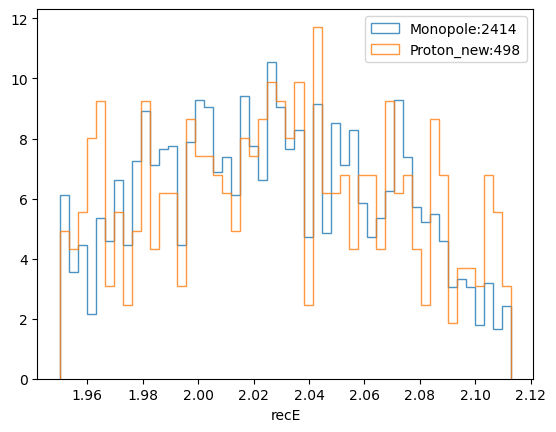

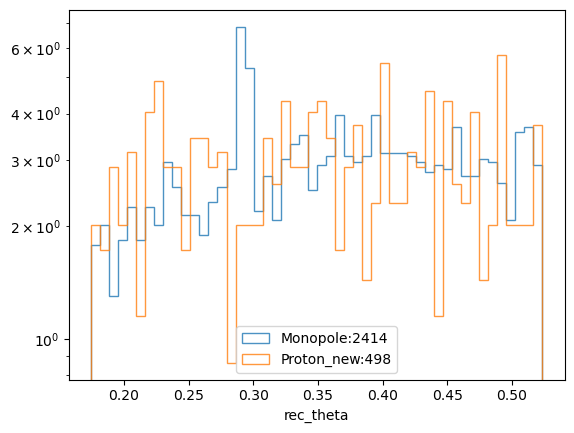

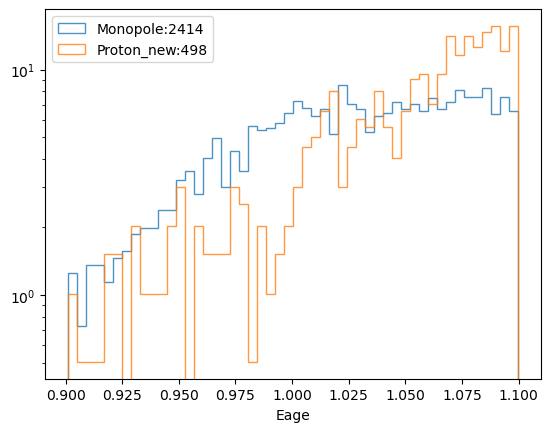

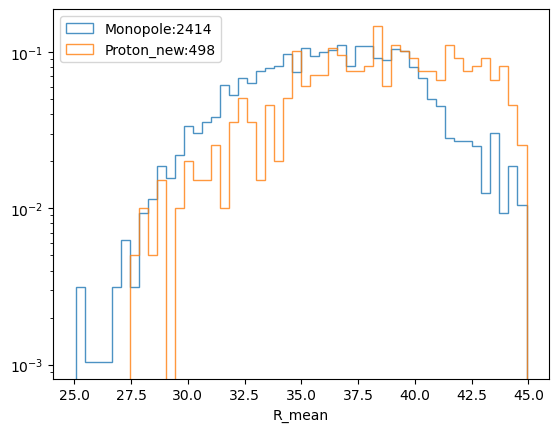

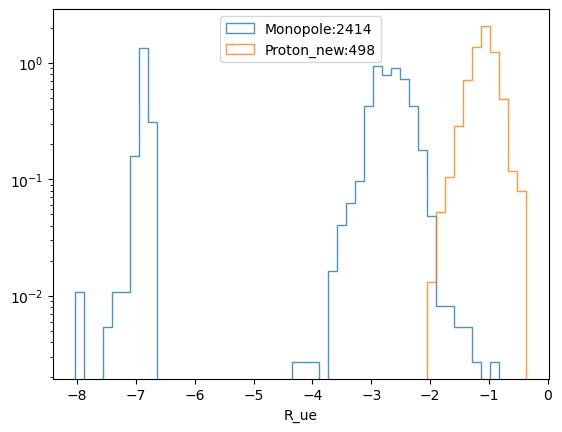

In [21]:

df_dict={
    
    "Monopole":monopole_df,
    # "Proton_old":proton_old_df,
    "Proton_new":proton_new_df,
    
    # "EF":proton_EF,
    # "QF":proton_QF,
    # "2022":data_2022
}


# 绘制直方图 recE rec_theta Eage R_mean  R_ue 
def plot_hist(df_dict,column="recE",bin_num=50, log=False):
    range_min=np.min([df[column].min() for df in df_dict.values()])
    range_max=np.max([df[column].max() for df in df_dict.values()])
    for name,df in df_dict.items():
        plt.hist(df[column],bins=bin_num,density=True,alpha=0.8, histtype="step",label=f"{name}:{len(df)}", range=(range_min,range_max))
    plt.legend()
    plt.xlabel(column)
    if log:
        plt.yscale('log')
    plt.show()
    plt.close()

plot_hist(df_dict,column="recE",bin_num=50, log=False)
plot_hist(df_dict,column="rec_theta",bin_num=50, log=True)
plot_hist(df_dict,column="Eage",bin_num=50, log=True)
plot_hist(df_dict,column="R_mean",bin_num=50, log=True)
plot_hist(df_dict,column="R_ue",bin_num=50, log=True)


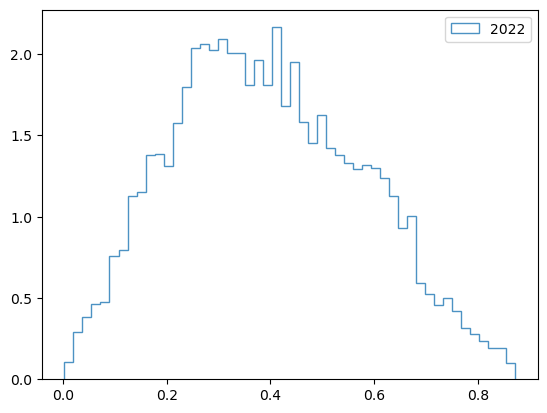

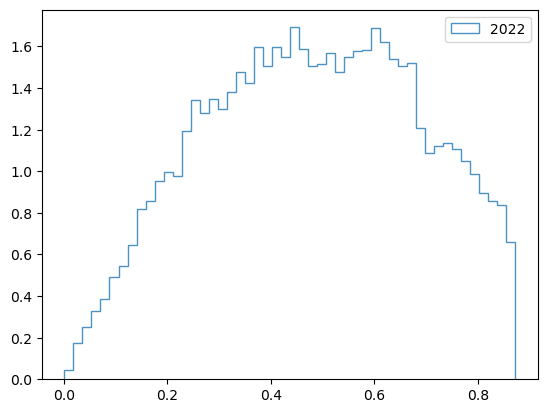

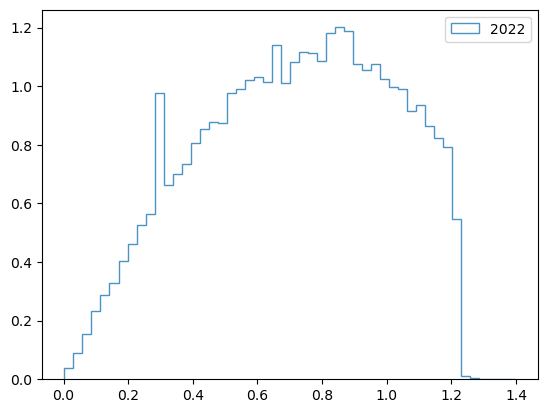

In [11]:
npz_file = "/home/zhonghua/data/Dataset_Filted/Experiment/2022/all_combined_2022_dataset_1e10_for_diffmodels.npz"
data=np.load(npz_file, allow_pickle=True)
import pandas as pd
df = pd.DataFrame(data['params'], columns=data['param_names'])
import matplotlib.pyplot as plt
plt.hist(df["rec_theta"],bins=50,density=True,alpha=0.8, histtype="step",label="2022")
plt.legend()
plt.show()
plt.close()
npz_file = "/home/zhonghua/data/Dataset_Filted/CosmicRay/Npz/Proton_1000_70_1e10_V03_dataset.npz"
data=np.load(npz_file, allow_pickle=True)

df = pd.DataFrame(data['params'], columns=data['param_names'])

plt.hist(df["rec_theta"],bins=50,density=True,alpha=0.8, histtype="step",label="2022")
plt.legend()
plt.show()
plt.close()
npz_file = "/home/zhonghua/data/Dataset_Filted/filted_Monopole_1e10_merged_1000_70_new_dataset.npz"
data=np.load(npz_file, allow_pickle=True)

df = pd.DataFrame(data['params'], columns=data['param_names'])

plt.hist(df["rec_theta"],bins=50,density=True,alpha=0.8, histtype="step",label="2022")
plt.legend()
plt.show()
plt.close()


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

mn_file="/home/zhonghua/data/Dataset_Filted/filted_Monopole_1e10_merged_1000_70_new_dataset.npz"
mn_data=np.load(mn_file, allow_pickle=True)
mn_df = pd.DataFrame(mn_data['params'], columns=mn_data['param_names'])

# pr_file="/home/zhonghua/data/Dataset_Filted/CosmicRay/Npz/Proton_1000_70_1e10_V03_dataset.npz"
# pr_data=np.load(pr_file, allow_pickle=True)
# pr_df = pd.DataFrame(pr_data['params'], columns=pr_data['param_names'])




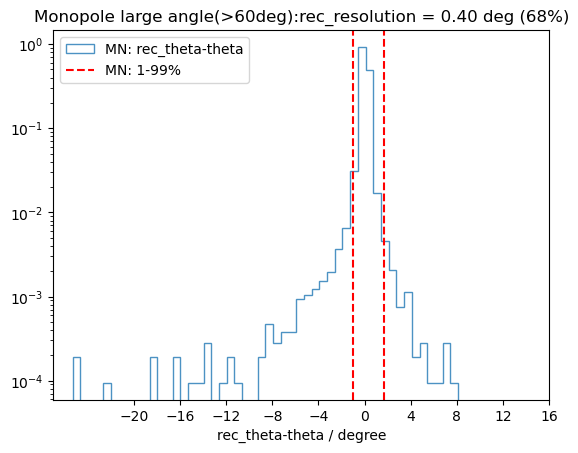

In [ ]:
cut=50
mn_df_large_angle=mn_df[(mn_df["rec_theta"]*180/np.pi>cut)]
mn_rec_theta=mn_df_large_angle["rec_theta"]*180/np.pi
mn_theta=mn_df_large_angle["theta"]*180/np.pi
mn_delta_theta=mn_rec_theta-mn_theta
# 前1% 前99%
mn_delta_theta_1=np.percentile(mn_delta_theta,1)
mn_delta_theta_99=np.percentile(mn_delta_theta,99)
one_sigma=np.percentile(mn_delta_theta,100-16)-np.percentile(mn_delta_theta,16)
# plt.hist(mn_df_large_angle["rec_theta"],bins=50,density=True,alpha=0.8, histtype="step",label="MN: rec_theta")
# plt.hist(mn_df_large_angle["theta"],bins=50,density=True,alpha=0.8, histtype="step",label="MN: theta")
# plt.legend()
# plt.yscale('log')
# plt.show()
# plt.close()

plt.hist(mn_theta-mn_rec_theta,bins=50,density=True,alpha=0.8, histtype="step",label="MN: rec_theta-theta")
plt.axvline(mn_delta_theta_1, color='r', linestyle='--',label="MN: 1-99%")
plt.axvline(mn_delta_theta_99, color='r', linestyle='--')
plt.legend()
plt.yscale('log')
plt.xlabel("rec_theta-theta / degree")
# 更密集的刻度
plt.xticks(np.arange(-20,20,4))
plt.title(f"Monopole large angle(>{cut}deg):rec_resolution = {one_sigma:.2f} deg (68%)")
plt.show()
plt.close()


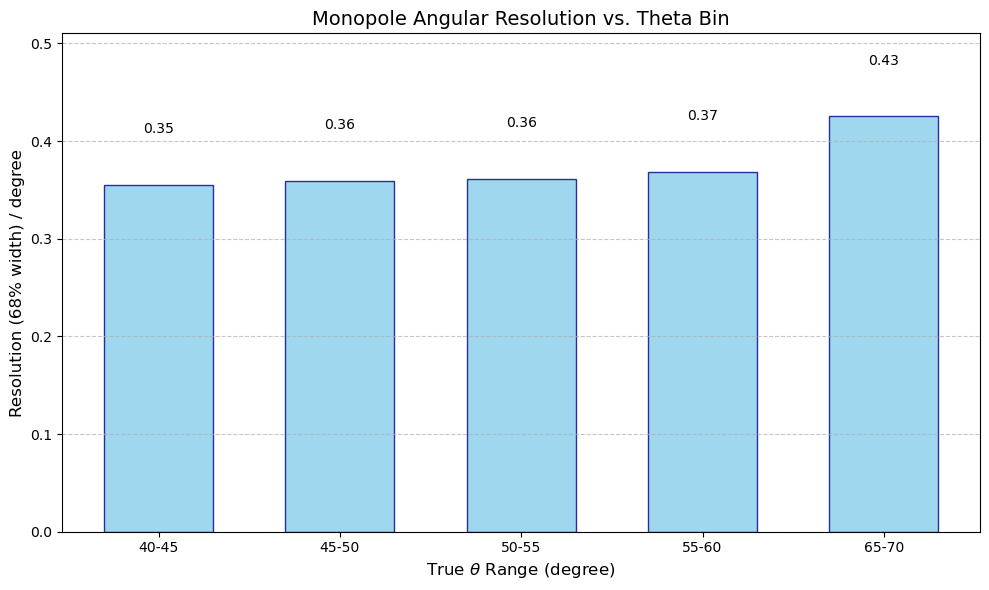

In [47]:
import numpy as np
import matplotlib.pyplot as plt

# 1. 定义区间 (注意：你跳过了 60-65)
bins = [(40, 45), (45, 50), (50, 55), (55, 60), (65, 70)]
bin_labels = [f"{b[0]}-{b[1]}" for b in bins]
resolutions = []

# 预先转换单位（弧度 -> 角度）
mn_df["theta_deg"] = mn_df["theta"] * 180 / np.pi
mn_df["rec_theta_deg"] = mn_df["rec_theta"] * 180 / np.pi
mn_df["delta_theta"] = mn_df["rec_theta_deg"] - mn_df["theta_deg"]

# 2. 循环计算每个区间的分辨率
for low, high in bins:
    # 筛选处于当前 theta 区间的数据
    mask = (mn_df["theta_deg"] >= low) & (mn_df["theta_deg"] < high)
    subset = mn_df["delta_theta"][mask]
    
    if len(subset) > 0:
        # 计算 68% 置信区间宽度 (84%分位数 - 16%分位数)
        res = np.percentile(subset, 84) - np.percentile(subset, 16)
        resolutions.append(res)
    else:
        resolutions.append(0)  # 如果该区间没数据，填0

# 3. 绘制柱状图
plt.figure(figsize=(10, 6))
bars = plt.bar(bin_labels, resolutions, color='skyblue', edgecolor='navy', alpha=0.8, width=0.6)

# 设置轴标签和标题
plt.xlabel(r"True $\theta$ Range (degree)", fontsize=12)
plt.ylabel("Resolution (68% width) / degree", fontsize=12)
plt.title("Monopole Angular Resolution vs. Theta Bin", fontsize=14)

# 4. 优化刻度和网格
plt.grid(axis='y', linestyle='--', alpha=0.7)  # 开启y轴网格
plt.ylim(0, max(resolutions) * 1.2 if resolutions else 10) # 留出顶部空间

# 在柱子上方标注具体数值
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 0.05,
             f'{height:.2f}', ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()


In [48]:
50/180*3.15159


0.8754416666666668